# CNN on the MNIST dataset

**02/04/2019, Dr Yu Sun, yu.sun@sydney.edu.au**

The MNIST dataset is a collection of hand-written digits with labels. There are 60,000 training samples and 10,000 test samples. The following code shows how to construct and train a CNN using Keras.

Pay attention on how you define the CNN stucture using Keras, especiall how to define

* a layer
* an activation function
* the number of convolution filers
* the convolution kernel size
* the cost function
* the mini-batch size
* the epotch
* the optimiser 

In [0]:
# Import the required module, keras in this case
import keras

In [0]:
# Download the data, and unpack them into training and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [34]:
print(x_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


In [35]:
# Preprocess the data so that they can be provided to the neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
print(x_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


We can actually plot one of these images and have a look.

In [36]:
# Import the module
from matplotlib import pyplot as plt

# Let's pick the first image (indicated by the first zero)
img = x_train[0, :,:,0]

# Have a look at the image dimension (should match with 28 x 28)
print(img.shape)

(28, 28)


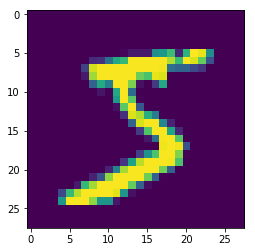

In [37]:
# Plot the image
plt.imshow(img)

It looks like a "5". We can confirm that by looking at the given label.

(28, 28)


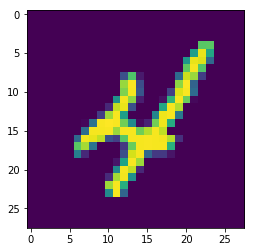

In [38]:
# Plot the tenth image in the test data
# Find out the corresponding label
# You code goes here

tenth_img = x_train[9, :,:,0]
print(tenth_img.shape)
plt.imshow(tenth_img)

# Looks like the number correspond to 4




In [39]:
# Print the corresponding lable
print(y_train[0])

5


In [0]:
# Normalise the data (so that they lie between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [0]:
# Create a variable to hold this configuration
input_shape = (28, 28, 1)

In [42]:
# Check the dimension of the training and test images
print('x training shape:', x_train.shape)
print('x testing shape:', x_test.shape)

x training shape: (60000, 28, 28, 1)
x testing shape: (10000, 28, 28, 1)


In [43]:
# Similarly, preprocess the labels for training and test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10, 10)
(10000, 10, 10)
(60000, 10)
(10000, 10)


In [44]:
# If you print y_train[0] now, what will you get?
# What do you think to_categorial() has done?
# Your code goes here
print(y_train[0])

# My guess:
# It convert the array into 10 distinct class labels. In other word, the function reshape the y value into x training value





[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# Define the deep learning structure

# Initialise the model, it's empty at the beginning
model = keras.models.Sequential()

# Add the first convolutional layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), 
                              activation='relu', input_shape=input_shape))
# Add the first pooling layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# Similarly the second convolutional layer
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
# The second pooling layer
model.add(keras.layers.MaxPooling2D((2,2)))

# Flatten the image (pulled into an array)
model.add(keras.layers.Flatten())
# Feed the array into a densely-connected neural network
model.add(keras.layers.Dense(128, activation='relu'))
# Use the softmax to map the output to probabilities
model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
# Configure the training details, e.g. what optimiser to use
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [48]:
# Fit the model. The loss and accuracy will be outputed by default.
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10)

ValueError: ignored

In [0]:
# Evaluate the performance
performance = model.evaluate(x_test, y_test)
print('The loss is %.3f and the accuracy is %.3f on the test data' 
      % tuple(performance))

10000/10000 [==============================] - 3s 275us/step
The loss is 0.031 and the accuracy is 0.990 on the test data
